# **Upgrading matplotlib and importing packages**

In [ ]:
!pip install matplotlib --upgrade
!pip install seaborn --upgrade

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

##  SKlearn libs for regressions
from sklearn import metrics, linear_model
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

##Importing Libraries for Neural Nets
import keras
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Activation
import math
from tqdm import tqdm
import pickle 

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', 100)

# **Importing datasets & pickle files**



In [2]:
original = pd.read_csv('original.csv')
original.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [5]:
with open('average_losses.pickle', 'rb') as handle:
    average_losses = pickle.load(handle)

with open('batch_exec_time.pickle', 'rb') as handle:
    batch_exec_time = pickle.load(handle)

with open('average_losses_in.pickle', 'rb') as handle:
    average_losses_in = pickle.load(handle)

with open('batch_exec_time_in.pickle', 'rb') as handle:
    batch_exec_time_in = pickle.load(handle)

In [3]:
df = original.drop('url', axis = 1)

X = df.drop('shares', axis = 1).copy()
y = df.shares.copy()

X_train = X[:25000]
y_train = y[:25000]
X_valid = X[25000:30000]
y_valid = y[25000:30000]
X_test = X[30000:]
y_test = y[30000:]

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(25000, 59)
(25000,)
(5000, 59)
(5000,)
(9644, 59)
(9644,)


# **Compute validation losses (without removing outliers)**


In [4]:
act = 'swish'
opt = 'RMSprop'
epoch = 30

In [12]:
average_losses = dict()

for batch_len in [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]:
    losses = []
    # Repeat training 5 times and take the average validation loss
    for _ in tqdm(range(5)):
        # Define the model
        keras.backend.clear_session()
        model = Sequential()
        model.add(Dense(16, input_dim=X_train.shape[1], activation=act))
        model.add(Dense(16, activation=act))
        model.add(Dense(1, activation='linear'))

        # Train the model
        model.compile(loss='mse', optimizer=opt, metrics=['mse'])
        history = model.fit(X_train, y_train, epochs=epoch, batch_size=batch_len,  verbose=0)

        # Compute and store the RMSE validation loss
        y_pred_valid = model.predict(X_valid)
        rmse_valid_loss = math.sqrt(metrics.mean_squared_error(y_valid, y_pred_valid))
        # rmse_valid_loss = round(rmse_valid_loss, 1)
        losses.append(rmse_valid_loss)
    
    # Compute and store the average loss for this batch size
    average_loss = np.mean(losses)
    average_loss = round(average_loss, 1)
    average_losses[batch_len] = average_loss

100%|██████████| 5/5 [00:13<00:00,  2.66s/it]


In [ ]:
average_losses

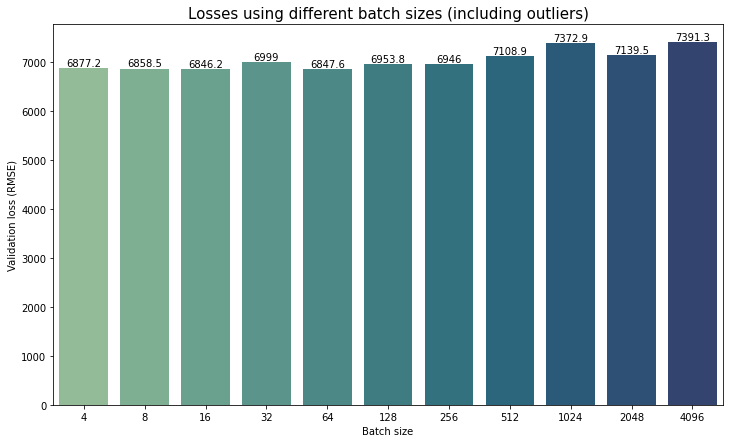

In [33]:
# Plot the validation loss for different batch sizes 
keys = list(average_losses.keys())
values = list(average_losses.values())
plt.figure(figsize = (12, 7))
ax = sns.barplot(x = keys, y = values, palette = 'crest')
ax.bar_label(ax.containers[0])
ax.set(xlabel='Batch size', ylabel='Validation loss (RMSE)')
ax.set_title( "Losses using different batch sizes (including outliers)", size = 15)
plt.show()

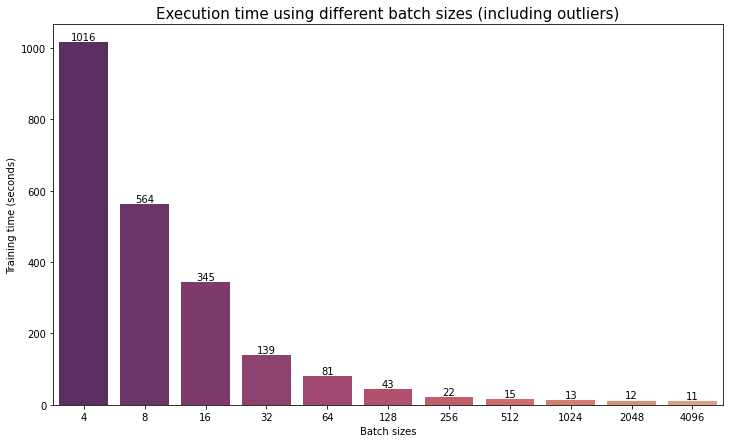

In [34]:
# Plot the execution time for different batch sizes 
keys = list(batch_exec_time.keys())
values = list(batch_exec_time.values())
plt.figure(figsize = (12, 7))
ax = sns.barplot(x = keys, y = values, palette = 'flare_r')
ax.bar_label(ax.containers[0])
ax.set(xlabel='Batch sizes', ylabel='Training time (seconds)')
ax.set_title( "Execution time using different batch sizes (including outliers)", size = 15)
plt.show()

# **Compute validation losses (after removing outliers)**

In [16]:
df.shape

(39644, 60)

In [18]:
df_inliers = df[df.shares <= 50000]
df_inliers.shape
# Around 200 data points have been dropped

(39441, 60)

In [20]:
X_in = df_inliers.drop('shares', axis = 1).copy()
y_in = df_inliers.shares.copy()

X_train_in = X_in[:25000]
y_train_in = y_in[:25000]
X_valid_in = X_in[25000:30000]
y_valid_in = y_in[25000:30000]
X_test_in = X_in[30000:]
y_test_in = y_in[30000:]

print(X_train_in.shape)
print(y_train_in.shape)
print(X_valid_in.shape)
print(y_valid_in.shape)
print(X_test_in.shape)
print(y_test_in.shape)

(25000, 59)
(25000,)
(5000, 59)
(5000,)
(9441, 59)
(9441,)


In [21]:
average_losses_in = dict()

for batch_len in [4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]:
    losses = []
    # Repeat training 5 times and take the average validation loss
    for _ in tqdm(range(5)):
        # Define the model
        keras.backend.clear_session()
        model = Sequential()
        model.add(Dense(16, input_dim=X_train_in.shape[1], activation=act))
        model.add(Dense(16, activation=act))
        model.add(Dense(1, activation='linear'))

        # Train the model
        model.compile(loss='mse', optimizer=opt, metrics=['mse'])
        history = model.fit(X_train_in, y_train_in, epochs=epoch, batch_size=batch_len, verbose=0)

        # Compute and store the RMSE validation loss
        y_pred_valid_in = model.predict(X_valid_in)
        rmse_valid_loss = math.sqrt(metrics.mean_squared_error(y_valid_in, y_pred_valid_in))
        losses.append(rmse_valid_loss)
    
    # Compute and store the average loss for this batch size
    average_loss = np.mean(losses)
    average_loss = round(average_loss, 1)
    average_losses_in[batch_len] = average_loss

100%|██████████| 5/5 [00:08<00:00,  1.74s/it]


In [ ]:
average_losses_in

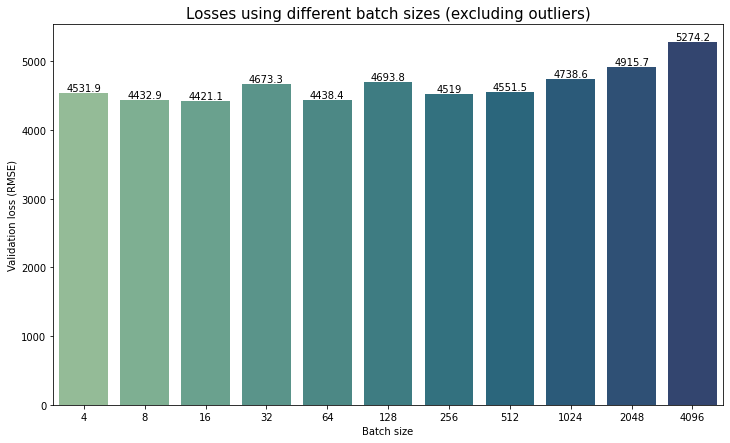

In [35]:
# Plot the validation loss for different batch sizes (inliers only)
keys = list(average_losses_in.keys())
values = list(average_losses_in.values())
plt.figure(figsize = (12, 7))
ax = sns.barplot(x = keys, y = values, palette = 'crest')
ax.bar_label(ax.containers[0])
ax.set(xlabel='Batch size', ylabel='Validation loss (RMSE)')
ax.set_title( "Losses using different batch sizes (excluding outliers)", size = 15)
plt.show()

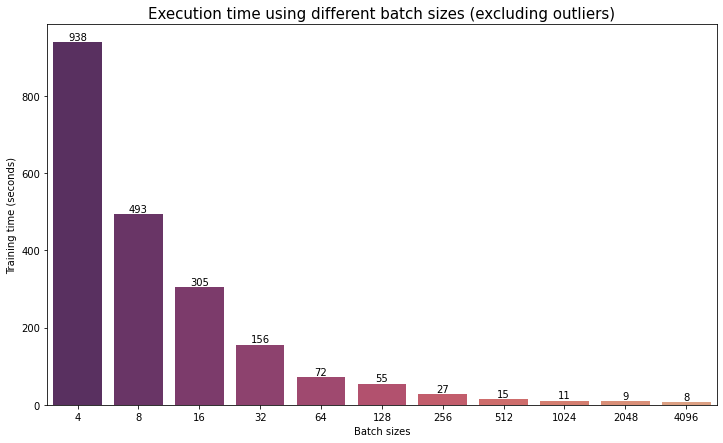

In [36]:
# Plot the execution time for different batch sizes 
keys = list(batch_exec_time_in.keys())
values = list(batch_exec_time_in.values())
plt.figure(figsize = (12, 7))
ax = sns.barplot(x = keys, y = values, palette = 'flare_r')
ax.bar_label(ax.containers[0])
ax.set(xlabel='Batch sizes', ylabel='Training time (seconds)')
ax.set_title( "Execution time using different batch sizes (excluding outliers)", size = 15)
plt.show()

# **Code for storing dicts as pickle files**

In [28]:
with open('average_losses_in.pickle', 'wb') as handle:
    pickle.dump(average_losses_in, handle)

with open('average_losses_in.pickle', 'rb') as handle:
    pickled_losses_in = pickle.load(handle)

pickled_losses_in == average_losses_in

True